<a href="https://colab.research.google.com/github/Teacher-Heiko/fastbook/blob/master/MaxPool_Dropout_BatchNorm0_9920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np



In [2]:
# # Download and prepare the dataset
# transform = transforms.Compose([
#     transforms.ToTensor(),
# ])

# dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [3]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = path

def get_dls(bs=128):
    return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter('training','testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

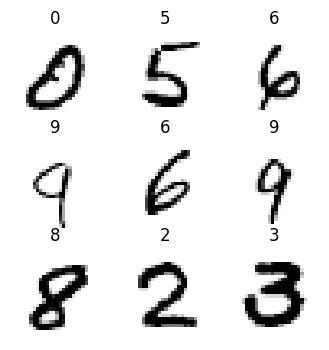

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

In [10]:
# learn.lr_find()

<figure>
<!-- <img src="./images/2-convmodel-2.png" width="250" alt="Diagram of a convolutional model."> -->
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Vko6nCK.png" width="250" alt="Diagram of a convolutional model.">
</figure>

In [16]:
def simple_cnn_batchnorm():
    return nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=(3, 3), stride=2, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.Conv2d(64, 128, kernel_size=(3, 3), stride=2, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Dropout(0.5),

        nn.MaxPool2d(2),
        nn.BatchNorm2d(128),

        nn.Conv2d(128, 128, kernel_size=(3, 3), stride=2, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(128 * 1 * 1, 128),  # Adjust the input size to match the number of flattened features
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Dropout(0.8),

        nn.Linear(128, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),

        nn.Linear(64, 10)
    )

In [17]:
learner = Learner(dls, simple_cnn_batchnorm(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))

In [18]:
learner.summary()


/usr/local/lib/python3.10/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Sequential (Input shape: 128 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 14 x 14  
Conv2d                                    640        True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     128 x 128 x 7 x 7   
Conv2d                                    73856      True      
BatchNorm2d                               256        True      
ReLU                                                           
Dropout                                                        
____________________________________________________________________________
                     128 x 128 x 3 x 3   
MaxPool2d                                                      
BatchNorm2d                               256        True      
____________________________________

In [19]:
learner.model

Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (10): ReLU()
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=128, out_features=128, bias=True)
  (15): ReLU()
  (16): BatchNorm1d(128, eps=1e-05, momentum=0.1, aff

In [ ]:
learner.fit_one_cycle(n_epoch=80)

epoch,train_loss,valid_loss,accuracy,time
0,0.020736,0.029723,0.991400,00:38
1,0.020450,0.029696,0.991300,00:37
2,0.018506,0.029821,0.991600,00:37
3,0.016665,0.029480,0.991100,00:37
4,0.018240,0.031500,0.991100,00:37
5,0.019404,0.031210,0.990800,00:36
6,0.023102,0.029036,0.991600,00:37
7,0.025577,0.033048,0.990900,00:37
8,0.020975,0.032421,0.990600,00:37
9,0.028172,0.032798,0.990700,00:37


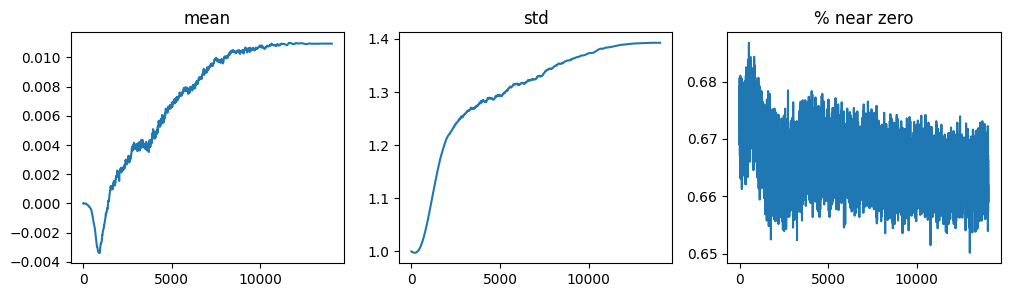

In [21]:
learner.activation_stats.plot_layer_stats(-2)